Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide and there are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass


In [87]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [6]:
#Read and study the provided dataset

#Create Dataframe object

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',header=None)
df.columns=['Id_Number','Refractive_Index','Sodium','Magnesium','Aluminium','Silicon','Potassium','Calcium','Barium','Iron','Glass_Type']
df

,Id_Number,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
#Explore the dataset

df.head()

,Id_Number,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.tail()

,Id_Number,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


The Id_Number is lamost not useful as its a reflection of dataset's index details, so should be dropped as:

In [ ]:
#Drop the Id_Number feature

df.drop(['Id_Number'],axis=1,inplace=True)

In [21]:
#Check head now

df.head()

,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
df.shape

(214, 10)

In [20]:
df.columns

Index(['Refractive_Index', 'Sodium', 'Magnesium', 'Aluminium', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Glass_Type'],
      dtype='object')

In [22]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (214, 10)

The column headers in the dataset: Index(['Refractive_Index', 'Sodium', 'Magnesium', 'Aluminium', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Glass_Type'],
      dtype='object')


* It could be observed that the dataset contains 214 rows and 10 columns now out of which one is the variable / feature of interest (Glass_Type) which has 6 classes according to the provided information as:

* 1- building_windows_float_processed
* 2- building_windows_non_float_processed
* 3- vehicle_windows_float_processed
* 5- containers
* 6- tableware
* 7- headlamps

as nos 4 class has been stated as non-existent in the dataset:

* 4- vehicle_windows_non_float_processed (none in this database)

In [23]:
#Check the description of the dataset

df.describe()

,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [24]:
df.dtypes

Refractive_Index    float64
Sodium              float64
Magnesium           float64
Aluminium           float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Glass_Type            int64
dtype: object

There are 2 data types of float and int

In [25]:
#Check the null (missing) values in the dataset

df.isnull().sum()

Refractive_Index    0
Sodium              0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Glass_Type          0
dtype: int64

There are no missing values in the dataset

In [31]:
#Check for duplicates and drop if found to avoid redundancy 

df[df.duplicated()]

,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [32]:
df.drop_duplicates(keep='last',inplace=True)

In [33]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive_Index  213 non-null    float64
 1   Sodium            213 non-null    float64
 2   Magnesium         213 non-null    float64
 3   Aluminium         213 non-null    float64
 4   Silicon           213 non-null    float64
 5   Potassium         213 non-null    float64
 6   Calcium           213 non-null    float64
 7   Barium            213 non-null    float64
 8   Iron              213 non-null    float64
 9   Glass_Type        213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


<Axes: >

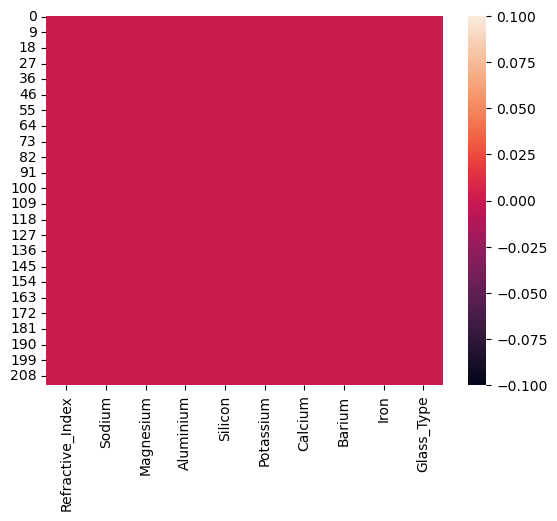

In [34]:
#Visualization using heatmap

sns.heatmap(df.isnull())

In [35]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
Refractive_Index,178
Sodium,142
Magnesium,94
Aluminium,118
Silicon,133
Potassium,65
Calcium,143
Barium,34
Iron,32
Glass_Type,6


In [36]:
#This value should be checked per column as follows:

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Refractive_Index
1.51645    3
1.52152    3
1.51590    3
1.51674    2
1.51769    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Sodium
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.31    1
14.17    1
13.51    1
13.81    1
14.23    1
Name: count, Length: 142, dtype: int64


Magnesium
0.00    42
3.48     8
3.54     8
3.58     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Aluminium
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Silicon
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
72.34    1
72.26    1
73.26    1
73.25    1
73.61    1
Name: count, Length: 133, dtype: int64


Potassium
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41    

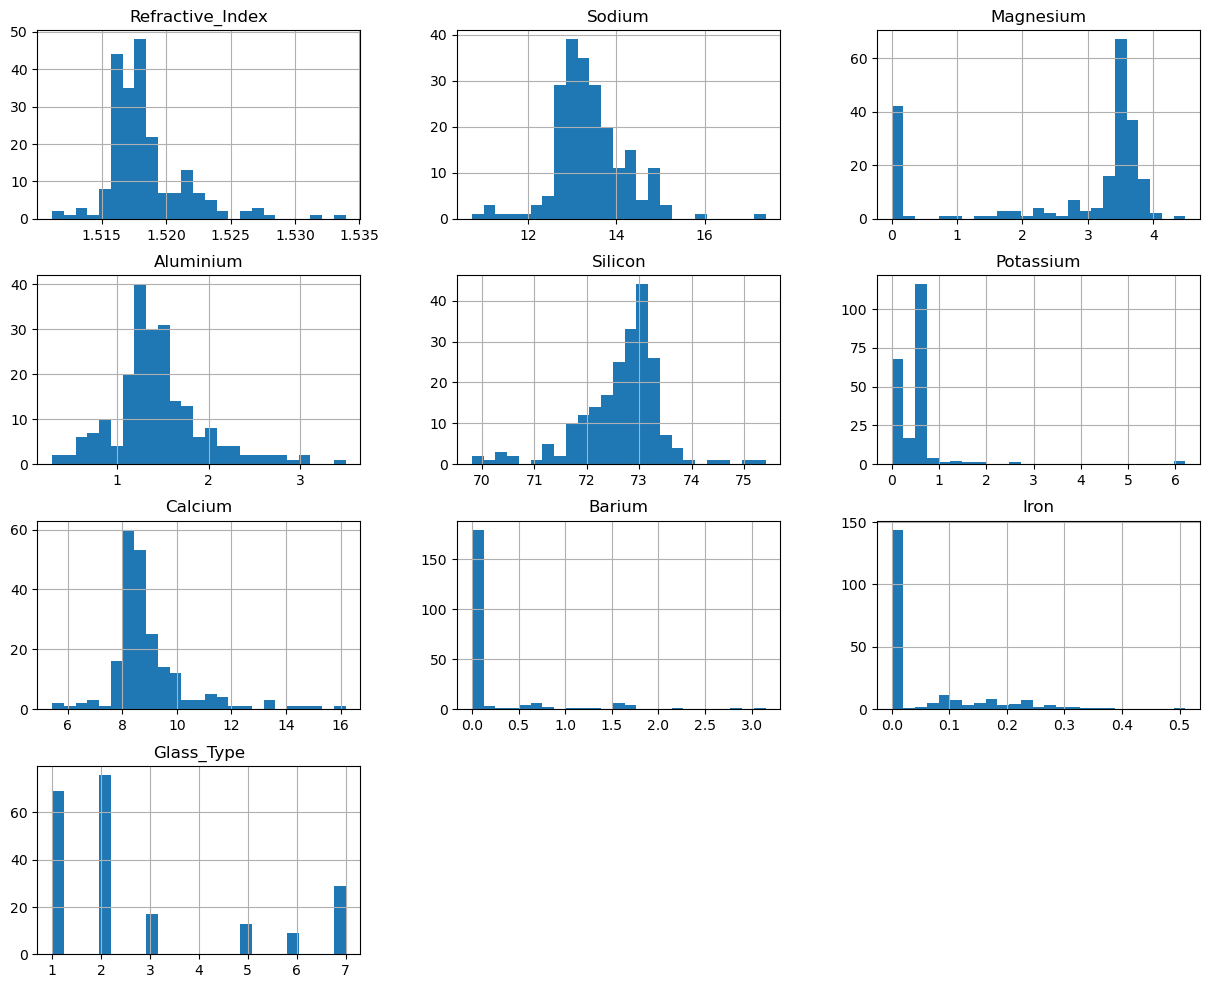

In [39]:
#Use visualization to further determine how the data is distributed on the features and display

df.hist(bins=25,figsize=(15,12))

plt.show()

<Axes: >

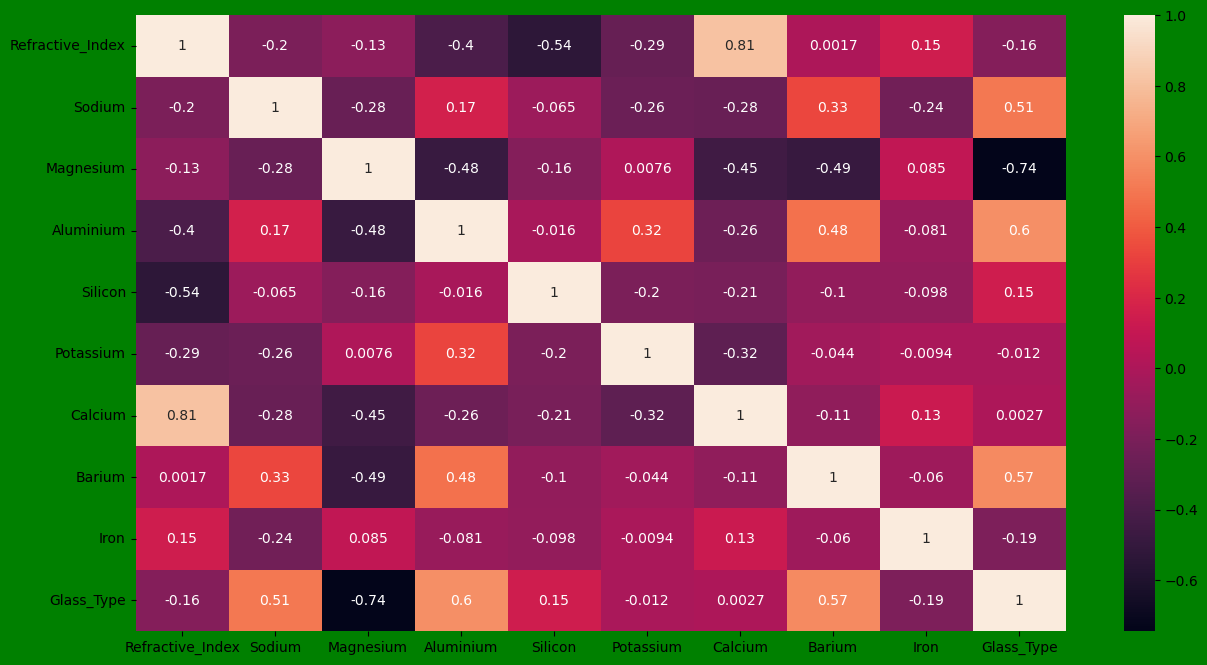

In [44]:
#Perform a correlation on the data to see nos of features that are correlated using heatmap

plt.figure(figsize=[15,8],facecolor='green')
sns.heatmap(df.corr(),annot=True)

Correlated features affect the accuracy of the model in an equal manner. So, one of the fully correalated features may have to be dropped.

To achieve this, we write a program to identify features with high correlation number greater than the set value, here 0.8. Therefore, any feature with correlation value > 0.8 is a fully correlated feature, and this amounted to calcium and refractive index which satisfy the condition.

In [96]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.8:
            name = df.corr().columns[a]

Also, check the distribution of the glass type in the dataset as shown below

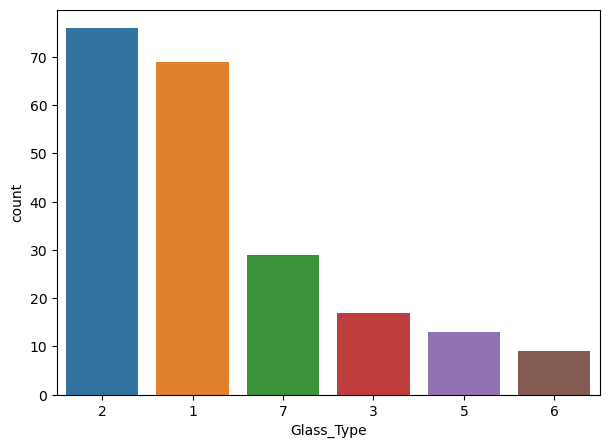

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x='Glass_Type', data=df, order=df['Glass_Type'].value_counts().index);

From the above distribution:

* it shows that there is imbalance in the classes of glass type; 
* glass types 2 and 1 have the highest occurences in the dataset.

Therefore, this needs to be balanced to have a fair model by ensuring that the train and test datasets have a good representation from all the types. This is because the dataset source is forensic sciences department and probably the reason of the high count of type 1 & 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware (i.e non-window glasses)

In [97]:
#Drop one of the correlated features

new_df=df.drop('Calcium',axis=1)

In [98]:
#Check and handle the null values in the new_df

new_df.isnull().sum()

Refractive_Index    0
Sodium              0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Barium              0
Iron                0
Glass_Type          0
dtype: int64

In [99]:
#Fill the resulting null values with fillna() fxn to sort out the numerical variables

new_df.update(new_df1.fillna(new_df.mean())) 
new_df

,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Barium,Iron,Glass_Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0,7


* Model Training: Split the dataset into training and testing sets. Normalize the input variables using MinMaxScaler.

In [100]:
#Carry out the separation and normalization of variables having stored independent variables in X variables and the dependent variables in y variables.

x=df.drop('Glass_Type',axis=1)

y=df['Glass_Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) #Split the dataset


norm = MinMaxScaler()                             #normalization and fitting
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

print(new_xtrain)

[[0.23705004 0.37578616 0.75501114 ... 0.29925651 0.         0.        ]
 [0.24231782 0.30188679 0.80400891 ... 0.29460967 0.         0.        ]
 [0.28709394 0.41352201 0.81514477 ... 0.29460967 0.         0.        ]
 ...
 [0.4547849  0.00157233 0.38084633 ... 0.57527881 0.         0.        ]
 [0.28138718 0.33490566 0.80400891 ... 0.26115242 0.         0.        ]
 [0.32177349 0.41194969 0.86191537 ... 0.26858736 0.         0.62745098]]


Train a classification model (e.g., Random Forest because it is the only ML model that gives the 88% accuracy i.e best accuracy) on the training set.

In [103]:
#Model application and data fitting

rnd = RandomForestClassifier()
fit_rnd = rnd.fit(new_xtrain,y_train)
y_predict = rnd.predict(new_xtest)


#Predicting score

rnd_score = rnd.score(new_xtest,y_test)
print('The model score is : ',rnd_score)

print('******************')

print('Calculate error')

#Mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)

#Root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)

print('mean squared error is : ',rnd_MSE)
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,y_test))

The model score is :  0.7441860465116279
******************
Calculate error
mean squared error is :  1.372093023255814
root mean squared error is :  1.1713637450663281
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.83      0.52      0.64        29
           3       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         2
           6       1.00      0.60      0.75         5
           7       1.00      0.71      0.83         7

    accuracy                           0.56        43
   macro avg       0.64      0.39      0.48        43
weighted avg       0.89      0.56      0.68        43



In [104]:
#Differentiate the predicted value from the actual value

x_predict = list(rnd.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}

pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
140,7,2
63,7,1
177,7,6
193,7,7
176,7,6
35,7,1
78,2,2
5,2,1
208,7,7
60,2,1


In [105]:
#Dataset originally classified glass types into 2 classes as:

#classes 1-4: Window Glass
#classes 5-7: Non-window Glass

#From above, the predicted classes of glass type are 2 & 7 which fall into both "Window Glass" and Non-window Glass" categories

In [91]:
#Save the Model

import pickle
file = 'wine_quality_prediction'

save = pickle.dump(rnd,open(file,'wb'))

xxxxxx ======== xxxxxx ======= xxxxxx